<a href="https://colab.research.google.com/github/teja12345678909876/dataanalyst/blob/main/03_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od


In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')

In [6]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

1. Association: A stastical relation between   two variables A and B are related in some way.
2. Dependence: it's a stronger relationship  one variable (A) influences the value or distribution of another variable (B).
3. Correlation: This refers to the strength and direction of the linear relationship between two variables.
4. Causation: This means that changes in one variable (A) directly cause changes in another variable (B).

threat_level    attack     other  undetermined
race                                          
A             0.564103  0.410256      0.025641
B             0.653722  0.283172      0.063107
H             0.576832  0.333333      0.089835
N             0.548387  0.419355      0.032258
O             0.607143  0.392857      0.000000
W             0.665279  0.292256      0.042465


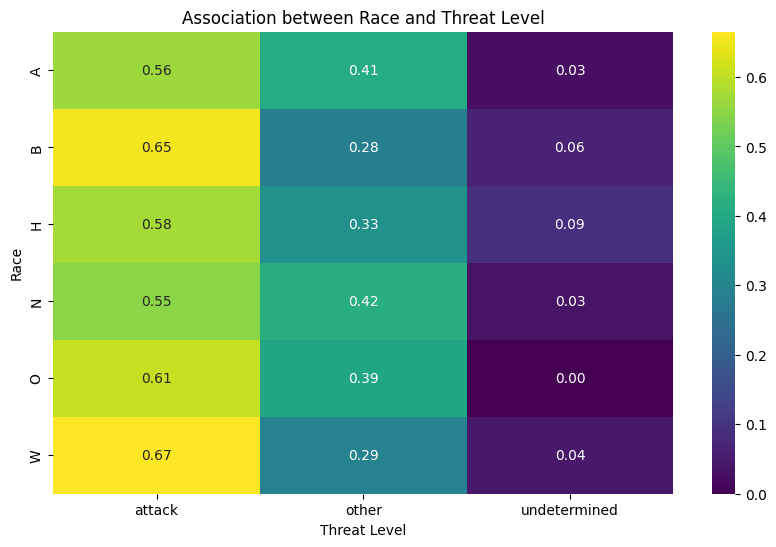

In [43]:
# prompt: A stastical relation between two variables A and B are related in some way. write a code for Association modify the code

# Example: Investigate the association between 'race' and 'threat_level'
# Calculate the frequency of each threat level for each race
race_threat_counts = data.groupby(['race', 'threat_level']).size().unstack(fill_value=0)


# Normalize the counts to get proportions (optional, for easier comparison)
race_threat_proportions = race_threat_counts.div(race_threat_counts.sum(axis=1), axis=0)

# Print the results
print(race_threat_proportions)


# Visualization (example using a heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(race_threat_proportions, annot=True, cmap='viridis', fmt=".2f")
plt.title('Association between Race and Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Race')
plt.show()


#Further analysis can include statistical tests (Chi-square test of independence) to quantify
# the association and determine its significance.

armed                Taser  air conditioner        ax  baseball bat  \
manner_of_death                                                       
shot              0.002123         0.000425  0.003397      0.002972   
shot and Tasered  0.023392         0.000000  0.005848      0.005848   

armed             baseball bat and bottle  baseball bat and fireplace poker  \
manner_of_death                                                               
shot                             0.000425                          0.000425   
shot and Tasered                 0.000000                          0.000000   

armed                baton   bayonet  bean-bag gun  beer bottle  ...  \
manner_of_death                                                  ...   
shot              0.000849  0.000425      0.000000     0.000425  ...   
shot and Tasered  0.000000  0.000000      0.005848     0.005848  ...   

armed                spear   stapler  straight edge razor     sword  \
manner_of_death                       

<ipython-input-45-3202f1f7f365>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


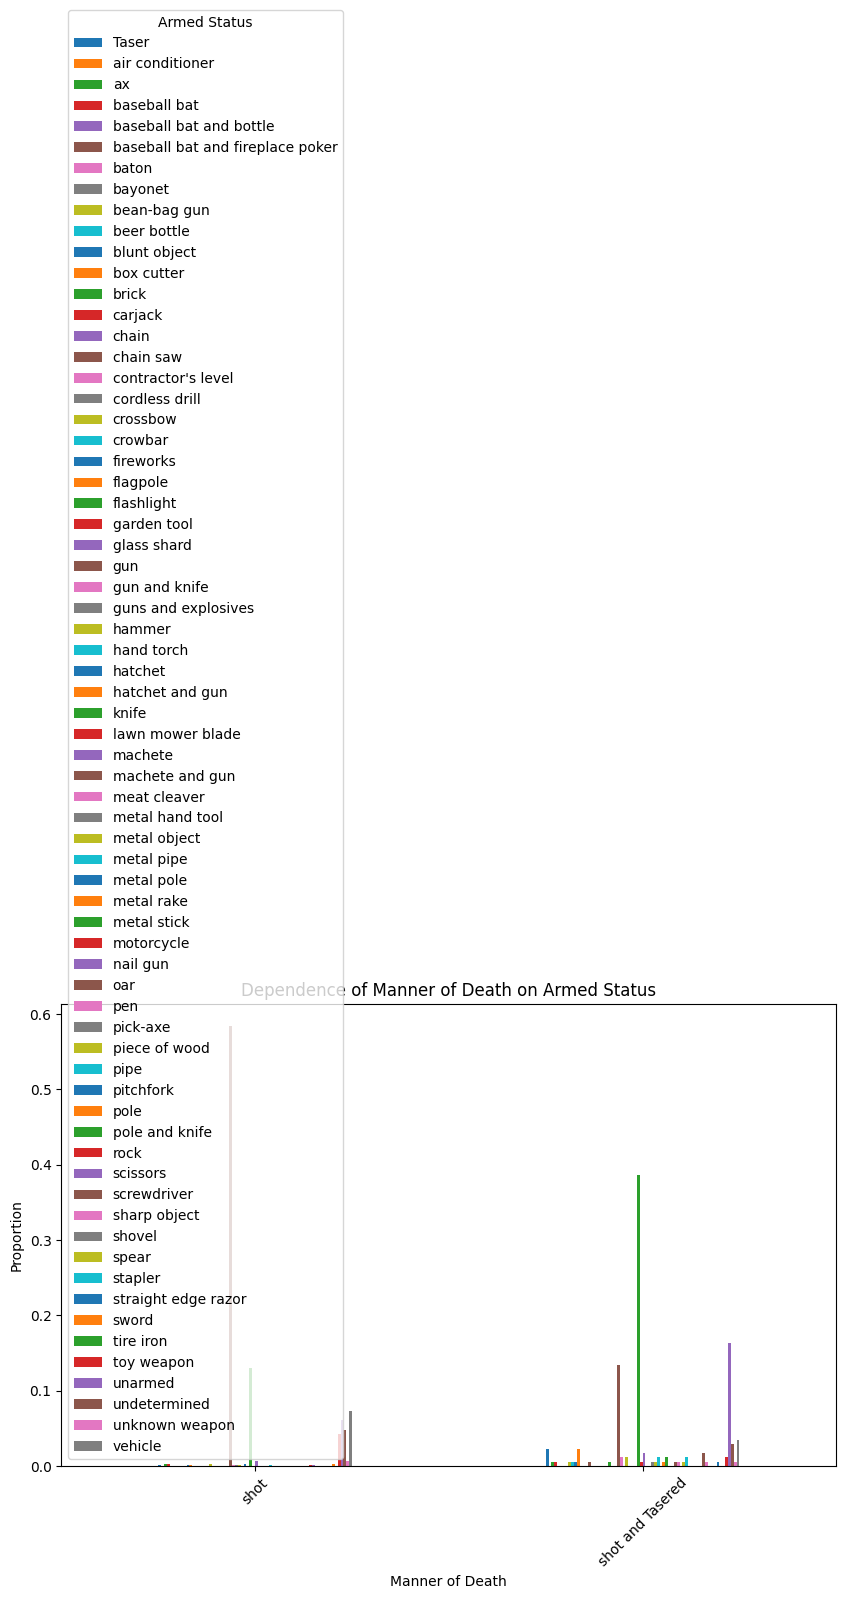

In [45]:
# prompt: Dependence: it's a stronger relationship  one variable (A) influences the value or distribution of another variable (B). write a code dependance


# Create a contingency table
manner_armed_counts = pd.crosstab(data['manner_of_death'], data['armed'])

# Calculate proportions for each manner of death
manner_armed_proportions = manner_armed_counts.div(manner_armed_counts.sum(axis=1), axis=0)

# Display the proportions
print(manner_armed_proportions)

# Visualization (example using a bar plot)
manner_armed_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Dependence of Manner of Death on Armed Status')
plt.xlabel('Manner of Death')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Armed Status')
plt.tight_layout()
plt.show()

#Further analysis can include statistical tests to determine the significance of the dependence.
# For example, Chi-square test of independence.

           id       age
id   1.000000  0.001939
age  0.001939  1.000000

Highly Correlated Variables:
      id  age
id   1.0  NaN
age  NaN  1.0


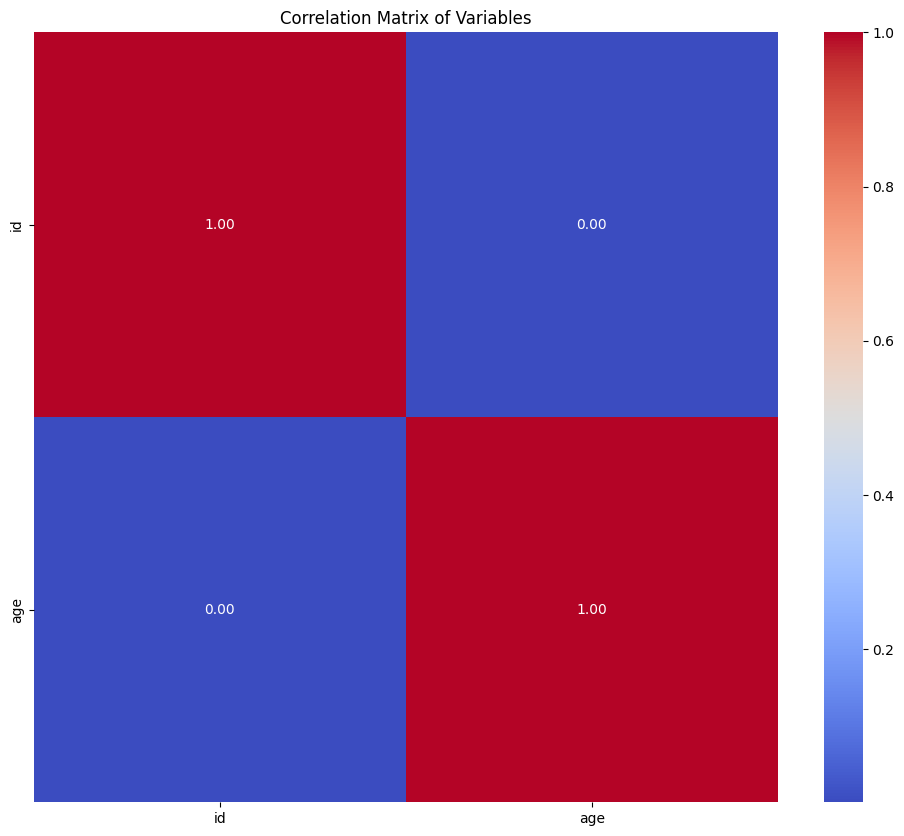

In [9]:


# Assuming your dataframe is named 'data' as in your previous code
# Replace 'data' with the actual name of your dataframe if different

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix (optional)
print(correlation_matrix)


# Find highly correlated variables (example: correlation > 0.7)
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.7]


# Print or visualize the highly correlated variables
print("\nHighly Correlated Variables:")
print(high_correlation)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

<Figure size 1200x600 with 0 Axes>

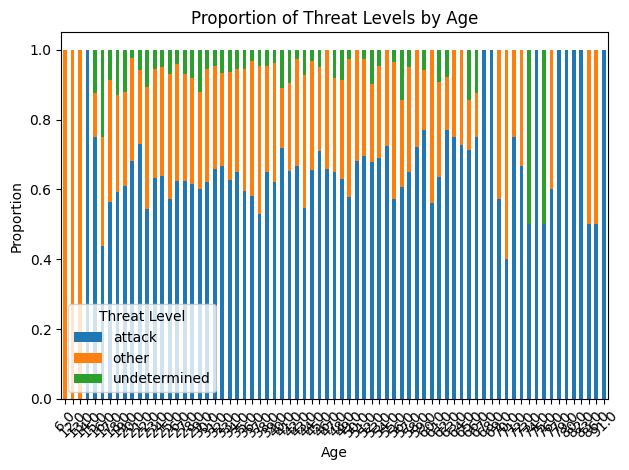

threat_level,attack,other,undetermined
age,,,
6.0,0.00,1.000,0.000
12.0,0.00,1.000,0.000
13.0,0.00,1.000,0.000
14.0,1.00,0.000,0.000
15.0,0.75,0.125,0.125
...,...,...,...
80.0,1.00,0.000,0.000
82.0,1.00,0.000,0.000
83.0,0.50,0.500,0.000


In [46]:
# prompt: write a code Causation: This means that changes in one variable (A) directly cause changes in another variable (B).

# Code to demonstrate causation is difficult with this dataset as it is observational.
# Establishing causation requires experimentation, which is not possible here.
# This code will show a potential association between age and threat level, but cannot prove causation.


# Convert age to numeric, coercing errors to NaN
data['age'] = pd.to_numeric(data['age'], errors='coerce')


# Group by age and threat level, then count occurrences
age_threat_counts = data.groupby(['age', 'threat_level']).size().unstack(fill_value=0)

# Calculate the proportion of each threat level for each age
age_threat_proportions = age_threat_counts.div(age_threat_counts.sum(axis=1), axis=0)


# Plot the proportions
plt.figure(figsize=(12, 6))
age_threat_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Threat Levels by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Threat Level')
plt.tight_layout()
plt.show()

age_threat_proportions

# Note: This only shows an association.  To establish causation,
# a controlled experiment would be necessary.  This dataset only provides
# observational data, where confounding factors could be influencing the results.

<ipython-input-10-144d53da15d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['manner_of_death_encoded'] = le.fit_transform(selected_data['manner_of_death'])


                              age  manner_of_death_encoded
age                      1.000000                 0.008699
manner_of_death_encoded  0.008699                 1.000000


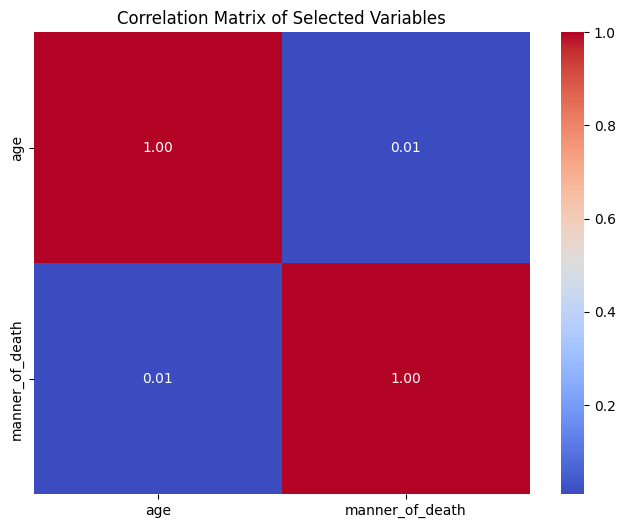

In [10]:

# Select the variables you want to analyze
variables = ['age', 'manner_of_death']

# Filter the dataframe to include only selected variables
selected_data = data[variables]

# Convert 'manner_of_death' to numerical representation using Label Encoding
# This is necessary for calculating correlation with a categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
selected_data['manner_of_death_encoded'] = le.fit_transform(selected_data['manner_of_death'])

# Now, calculate the correlation matrix using the encoded column and 'age'
correlation_matrix = selected_data[['age', 'manner_of_death_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix, using original 'manner_of_death' for labels
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['age', 'manner_of_death'], # Using original labels for better readability
            yticklabels=['age', 'manner_of_death']) # Using original labels for better readability
plt.title("Correlation Matrix of Selected Variables")
plt.show()

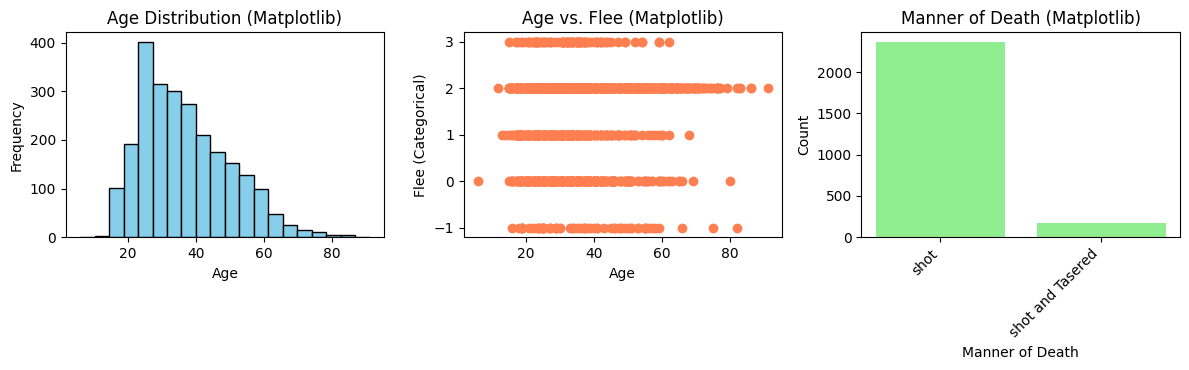

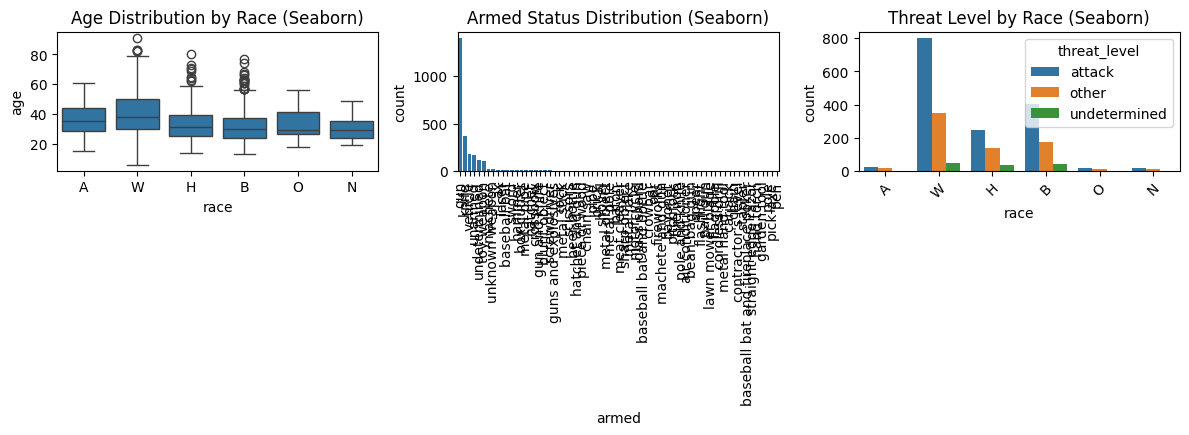

In [11]:



# --- Matplotlib Charts ---

plt.figure(figsize=(12, 6))

# Matplotlib Chart 1: Histogram of Age
plt.subplot(2, 3, 1)  # Create a subplot grid of 2 rows and 3 columns
plt.hist(data['age'].dropna(), bins=20, color='skyblue', edgecolor='black') #Handle potential NaN values
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution (Matplotlib)")

# Matplotlib Chart 2: Scatter Plot of Age vs. Flee
plt.subplot(2, 3, 2)
plt.scatter(data['age'], data['flee'].astype('category').cat.codes, color='coral') # Convert 'flee' to numerical representation for plotting
plt.xlabel('Age')
plt.ylabel('Flee (Categorical)')
plt.title('Age vs. Flee (Matplotlib)')


# Matplotlib Chart 3: Bar Chart of Manner of Death
manner_counts = data['manner_of_death'].value_counts()
plt.subplot(2, 3, 3)
plt.bar(manner_counts.index, manner_counts.values, color='lightgreen')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death (Matplotlib)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# --- Seaborn Charts ---


plt.figure(figsize=(12, 6))

# Seaborn Chart 1: Box Plot of Age by Race
plt.subplot(2, 3, 4)
sns.boxplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race (Seaborn)')

# Seaborn Chart 2: Count Plot of Armed Status
plt.subplot(2, 3, 5)
sns.countplot(x='armed', data=data, order=data['armed'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Armed Status Distribution (Seaborn)')

# Seaborn Chart 3:  Relationship between Threat Level and Race
plt.subplot(2, 3, 6)
sns.countplot(x='race', hue='threat_level', data=data) # Using countplot with hue for categorical variable
plt.title('Threat Level by Race (Seaborn)')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

1. correlation matrix shows a very weak correlation between the variables 'id' and 'age'.
2. The correlation coefficient is close to 0, indicating that there is no linear relationship between the two variables.


   **   charts**
3. Chart-1 Age Distribution (Matplotlib)
4. Chart-2 Age vs. Flee (Matplotlib)
5. Chart-3 Manner of Death (Matplotlib)
6. Chart-4 Age Distribution by Race (Seaborn)
7. Chart-5 Armed Status Distribution (Seaborn)
8. Chart-6 Threat Level by Race (Seaborn)
  
